In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV
import time

In [2]:
csv = pd.read_csv('lfd_2023_group2test.csv')
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    5000 non-null   int64  
 2   length_cm   5000 non-null   int64  
 3   wavelength  5000 non-null   int64  
 4   country     5000 non-null   object 
 5   cost        5000 non-null   int64  
 6   recoil      5000 non-null   float64
 7   y_offset    5000 non-null   float64
 8   shape       5000 non-null   object 
 9   distance    5000 non-null   float64
 10  target      5000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 429.8+ KB


<Axes: >

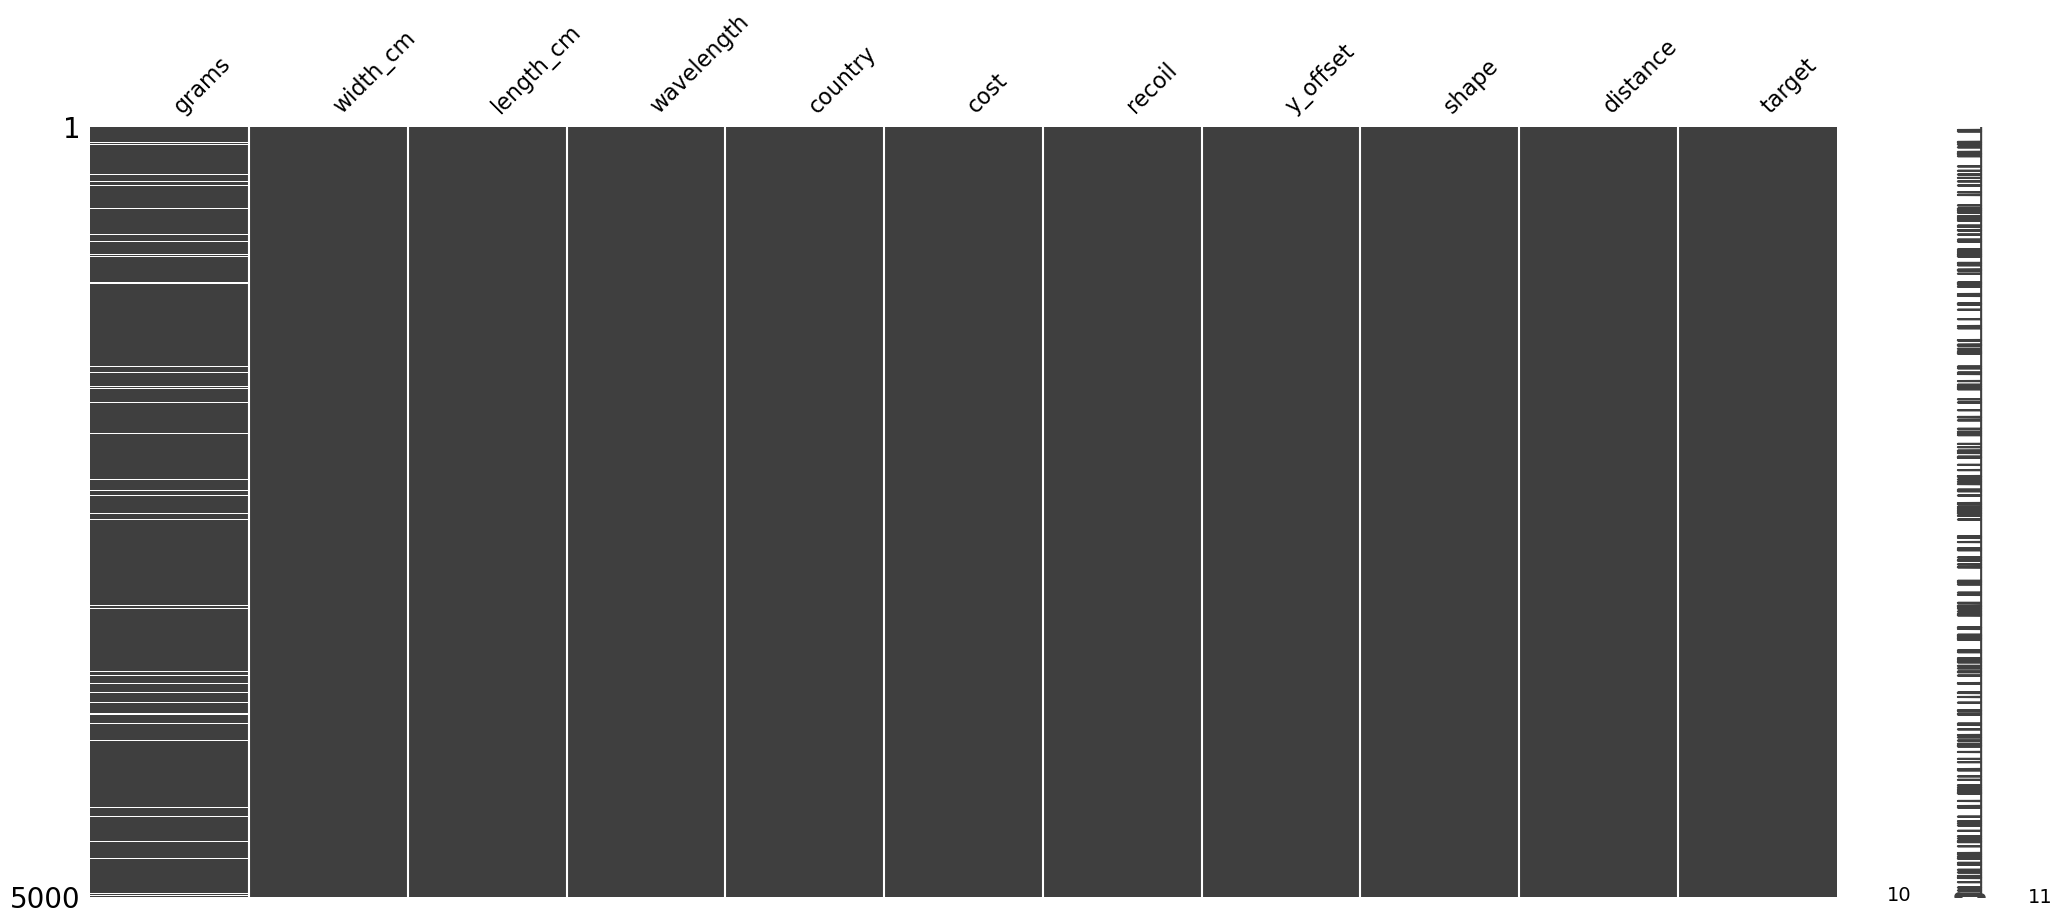

In [3]:
msno.matrix(csv.sample(5000))

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
 10  target      4751 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 445.4+ KB


<Axes: >

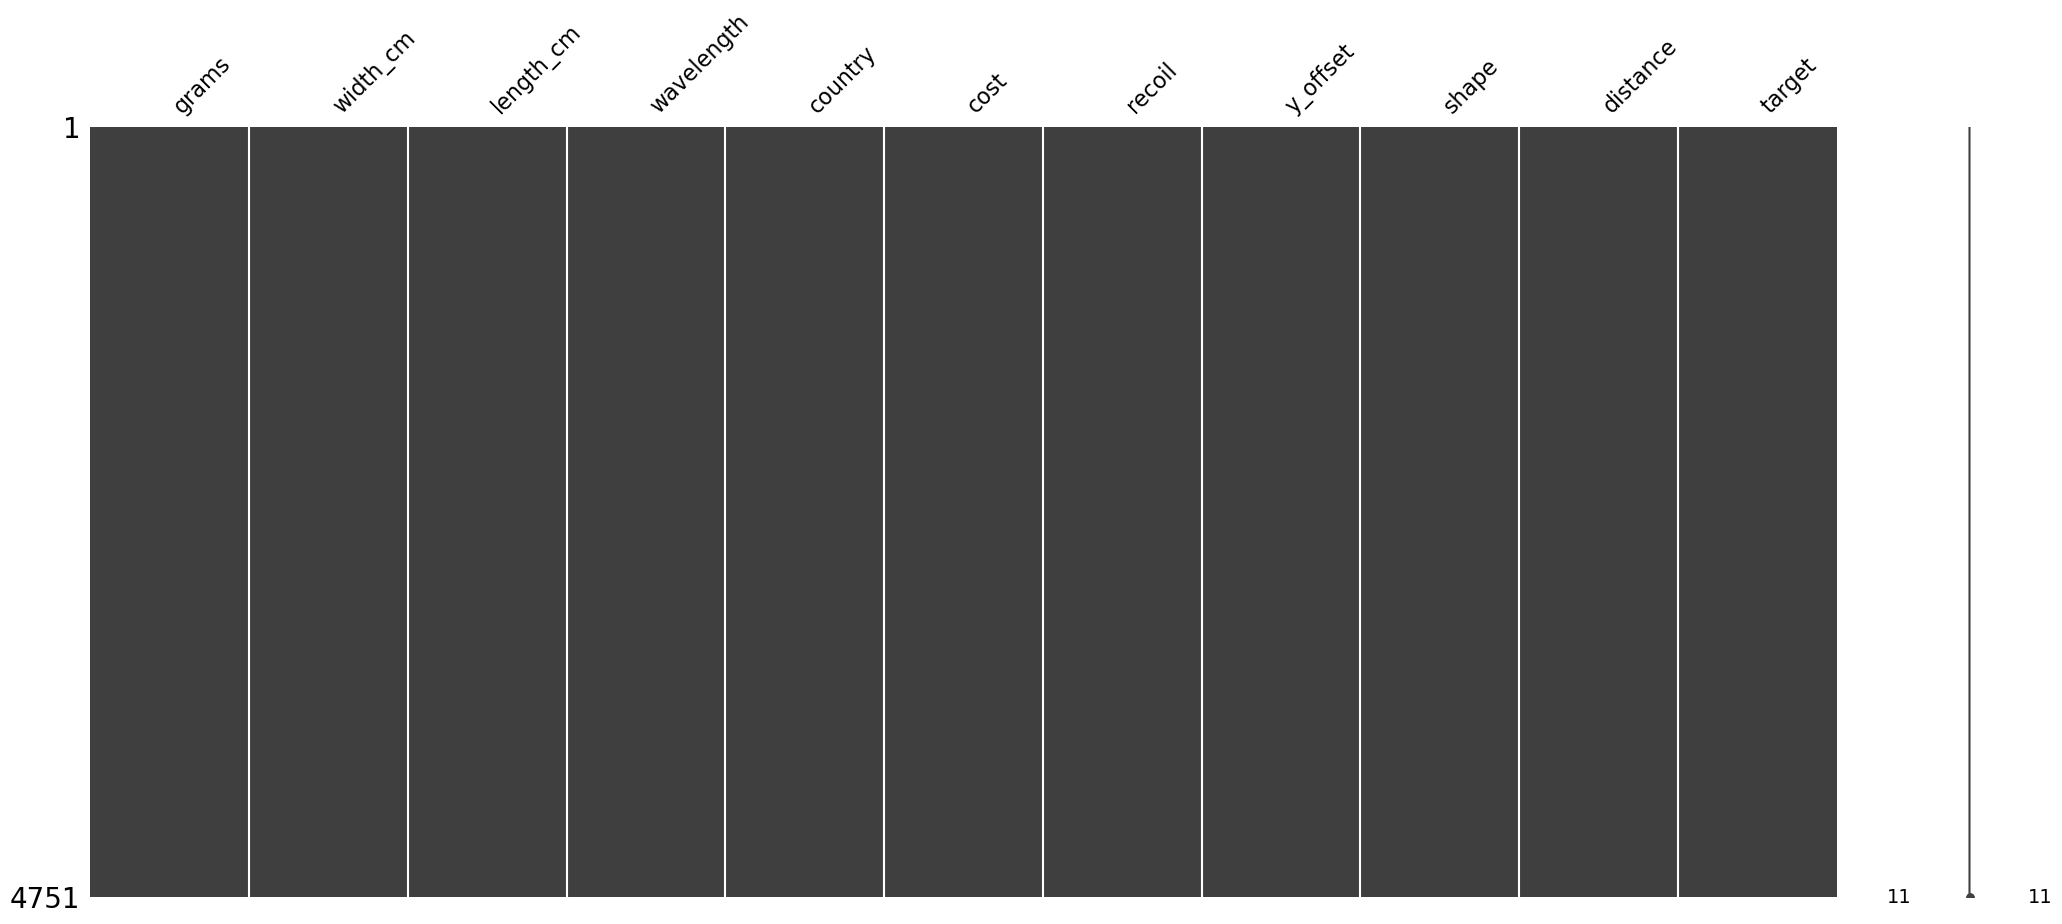

In [4]:
csv2 = csv.dropna()
csv3 = csv2.drop_duplicates()
csv3.info()
msno.matrix(csv3.sample(4751))

In [5]:
X = csv3.iloc[:, :-1].values
y = csv3.iloc[:, -1].values

In [6]:
y

array(['widget7', 'widget1', 'widget5', ..., 'widget4', 'widget2',
       'widget8'], dtype=object)

In [7]:
ct = ColumnTransformer(transformers=[
    ('encoder_4', OneHotEncoder(), [4]),
    ('encoder_8', OneHotEncoder(), [8])
], remainder='passthrough')
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 19.7, 28.7, 48.41],
       [0.0, 0.0, 0.0, ..., 43.28, -27.19, 39.84],
       [0.0, 0.0, 0.0, ..., 60.54, -72.91, 47.33],
       ...,
       [1.0, 0.0, 0.0, ..., 62.07, 14.78, 34.24],
       [0.0, 0.0, 0.0, ..., 28.24, -102.8, 43.03],
       [0.0, 1.0, 0.0, ..., 73.94, -50.94, 49.93]], dtype=object)

In [8]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([6, 0, 4, ..., 3, 1, 7])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [10]:
X_train

array([[0.0, 0.0, 1.0, ..., 24.09, 20.39, 42.91],
       [0.0, 0.0, 0.0, ..., 52.39, -20.58, 31.67],
       [0.0, 1.0, 0.0, ..., 75.19, 2.58, 48.71],
       ...,
       [1.0, 0.0, 0.0, ..., 62.84, -108.54, 35.36],
       [0.0, 0.0, 0.0, ..., 67.43, 68.0, 53.91],
       [0.0, 0.0, 0.0, ..., 70.82, -79.58, 52.01]], dtype=object)

In [11]:
X_test

array([[0.0, 0.0, 0.0, ..., 68.76, 45.44, 48.03],
       [0.0, 0.0, 0.0, ..., 25.98, -22.3, 36.48],
       [0.0, 0.0, 0.0, ..., 60.24, -4.77, 45.08],
       ...,
       [0.0, 0.0, 0.0, ..., 52.74, -71.7, 35.12],
       [0.0, 0.0, 0.0, ..., 24.01, -59.64, 45.23],
       [0.0, 0.0, 0.0, ..., 37.16, -127.63, 32.64]], dtype=object)

In [12]:
y_train

array([1, 3, 7, ..., 7, 8, 7])

In [13]:
y_test

array([7, 0, 7, 0, 4, 6, 8, 8, 8, 1, 0, 6, 2, 1, 7, 2, 8, 8, 2, 1, 5, 2,
       2, 6, 6, 1, 5, 6, 8, 0, 6, 3, 4, 2, 1, 3, 2, 6, 6, 6, 6, 8, 3, 4,
       0, 8, 3, 2, 2, 0, 8, 4, 5, 3, 8, 3, 6, 6, 5, 6, 6, 6, 2, 3, 7, 3,
       6, 6, 3, 4, 5, 2, 6, 5, 3, 0, 1, 8, 0, 6, 7, 3, 0, 4, 2, 1, 2, 6,
       1, 4, 2, 5, 8, 2, 5, 0, 8, 1, 0, 2, 6, 7, 3, 8, 6, 8, 5, 6, 8, 7,
       1, 0, 1, 2, 4, 8, 2, 8, 0, 2, 2, 1, 8, 7, 2, 5, 4, 3, 6, 1, 3, 0,
       3, 1, 8, 8, 8, 2, 3, 7, 2, 4, 2, 3, 5, 2, 3, 1, 6, 7, 6, 5, 3, 7,
       3, 0, 3, 8, 5, 5, 4, 2, 5, 2, 6, 8, 5, 8, 3, 4, 5, 2, 1, 2, 7, 6,
       0, 0, 0, 2, 7, 0, 7, 5, 4, 8, 2, 7, 5, 0, 0, 8, 8, 2, 3, 3, 5, 2,
       0, 8, 7, 2, 7, 8, 6, 0, 8, 4, 4, 5, 2, 3, 8, 8, 4, 7, 4, 0, 6, 0,
       1, 6, 1, 3, 3, 2, 1, 8, 2, 5, 7, 3, 1, 8, 7, 5, 7, 1, 1, 0, 5, 0,
       5, 0, 4, 4, 6, 5, 6, 5, 8, 3, 8, 8, 4, 6, 5, 2, 2, 3, 2, 7, 0, 7,
       5, 2, 5, 4, 2, 7, 3, 6, 1, 3, 6, 7, 1, 2, 2, 6, 7, 4, 8, 1, 7, 5,
       1, 3, 7, 8, 1, 1, 6, 4, 2, 2, 2, 5, 8, 7, 1,

In [14]:
sc = StandardScaler()
X_train[:, 16:] = sc.fit_transform(X_train[:, 16:])
X_test[:, 16:] = sc.transform(X_test[:, 16:])

In [15]:
X_train

array([[0.0, 0.0, 1.0, ..., -1.3605606964284784, 0.44001644617005986,
        0.3396859375552734],
       [0.0, 0.0, 0.0, ..., 0.4570477288486637, -0.1330944689207881,
        -0.8376167093765304],
       [0.0, 1.0, 0.0, ..., 1.9214107004500358, 0.19088036128433855,
        0.9471908621286248],
       ...,
       [1.0, 0.0, 0.0, ..., 1.1282140908326261, -1.363527373274974,
        -0.45111788667382974],
       [0.0, 0.0, 0.0, ..., 1.4230134785365869, 1.1060113367601325,
        1.4918504496771459],
       [0.0, 0.0, 0.0, ..., 1.640741130893106, -0.9584189500132956,
        1.2928402157651862]], dtype=object)

In [16]:
X_test

array([[0.0, 0.0, 0.0, ..., 1.5084346518800003, 0.7904296368712007,
        0.8759661468338181],
       [0.0, 0.0, 0.0, ..., -1.2391727132562593, -0.1571547758272138,
        -0.33380659089414844],
       [0.0, 0.0, 0.0, ..., 0.9612253309131714, 0.08806451491094991,
        0.5669765731284065],
       ...,
       [0.0, 0.0, 0.0, ..., 0.4795269849916673, -0.8481891718606015,
        -0.4762560214837617],
       [0.0, 0.0, 0.0, ..., -1.3656988121183076, -0.6794872525050821,
        0.5826879073846137],
       [0.0, 0.0, 0.0, ..., -0.5211210456026042, -1.6305688028352445,
        -0.7360167478530563]], dtype=object)

## Naive Bayes

In [18]:
start_time = time.time()

model = GaussianNB()
model.fit(X_train, y_train)

nb_training_time = time.time() - start_time
print('Training Time:', nb_training_time)
naive=[0.004, 0.0041, 0.0055, 0.005, 0.006]

Training Time: 0.0050013065338134766


In [19]:
y_pred = model.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)

array([[7, 7],
       [0, 0],
       [7, 7],
       ...,
       [4, 4],
       [6, 6],
       [0, 0]])

Accuracy: 0.9190325972660357


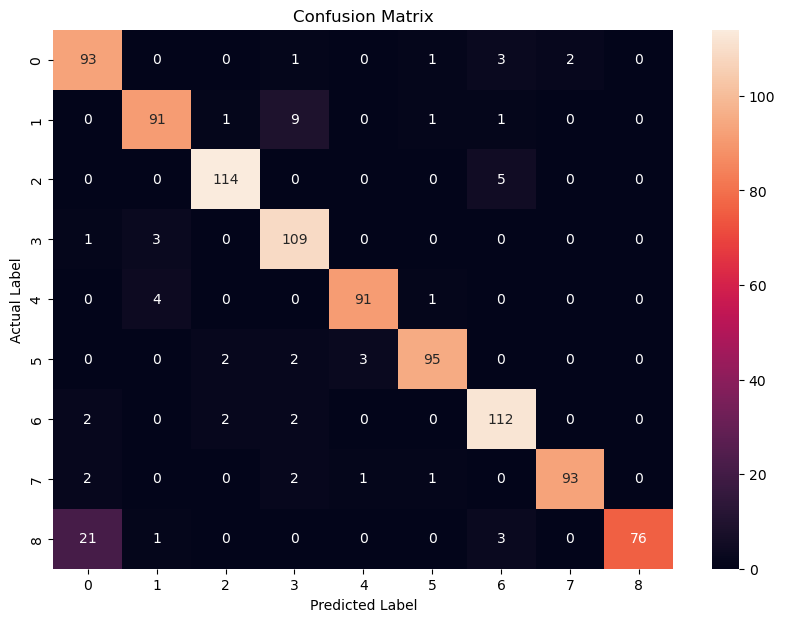

In [20]:
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Random Forest (RandomForestClassifier)

In [21]:
rf=[]
rf_store=[1.6908, 1.7149, 1.6753, 1.6596, 1.6712]
ir=range(1,6)

for i in ir:
    start_time = time.time()

    model = RandomForestClassifier(n_estimators = 184, criterion = 'entropy',random_state=1)
    model.fit(X_train, y_train)

    rf_training_time = time.time() - start_time
    print('RF Training Time:', rf_training_time)
    rf.append(rf_training_time)
    i = i+1
rf


RF Training Time: 1.7509832382202148
RF Training Time: 1.7936677932739258
RF Training Time: 1.697500228881836
RF Training Time: 1.6601688861846924
RF Training Time: 1.7180626392364502


[1.7509832382202148,
 1.7936677932739258,
 1.697500228881836,
 1.6601688861846924,
 1.7180626392364502]

In [22]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


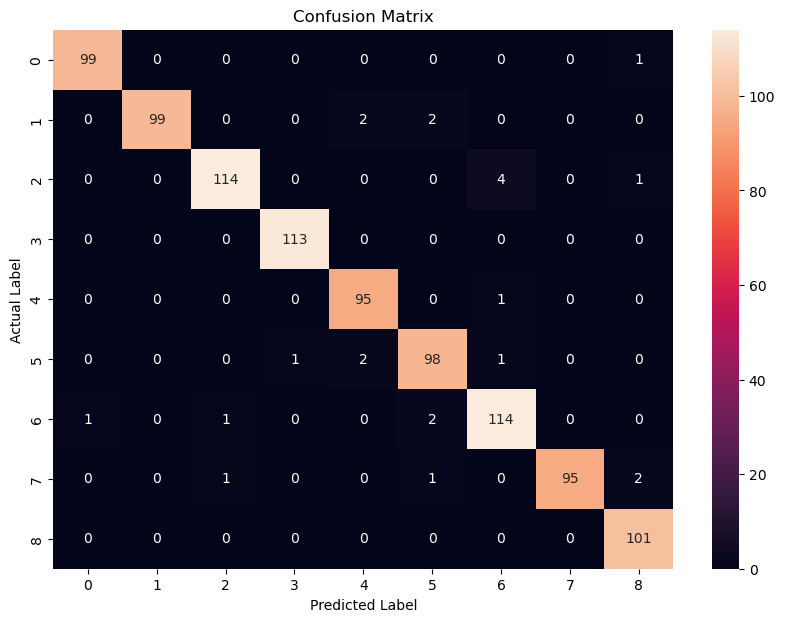

In [24]:
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



In [43]:
n_estimators_range = range(1, 201)  # Range of number of estimators
ir=range(1,5)
scores = []
rftime = []#256.6548581123352
rftimestore=[256.6549, 220.9796712398529, 191.29112482070923, 190.9539647102356, 191.23814129829407]

for i in ir:
    start_time = time.time()
    # Run the loop over the range of n_estimators

    for n_estimators in n_estimators_range:
        model = RandomForestClassifier(n_estimators = n_estimators, criterion = 'entropy',random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    rf_time = time.time() - start_time
    rftime.append(rf_time)

rftime



[220.9796712398529, 191.29112482070923, 190.9539647102356, 191.23814129829407]

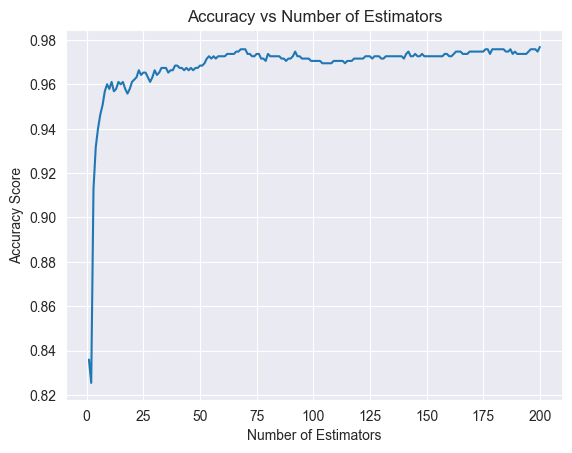

In [178]:
plt.plot(n_estimators_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Estimators')
plt.show()

In [44]:
rf_grid = []
ir=range(1,5)
rf_grid_store=[856.1625998020172, 819.738733291626, 791.0501453876495, 1127.1114888191223]

for i in ir:
    start_time = time.time()

    parameter = {'n_estimators': range(1, 201)}
    model = RandomForestClassifier(criterion='entropy', random_state=1)
    grid_search = GridSearchCV(estimator=model, param_grid=parameter, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_n_estimators = grid_search.best_estimator_.get_params()['n_estimators']
    print(f"The best number of estimators is: {best_n_estimators}")

    rf_gridtime = time.time() - start_time
    rf_grid.append(rf_gridtime)

rf_grid

The best number of estimators is: 192
The best number of estimators is: 192
The best number of estimators is: 192
The best number of estimators is: 192


[856.1625998020172, 819.738733291626, 791.0501453876495, 1127.1114888191223]

## Random Forest (Bagging)

In [33]:
decisiontree = DecisionTreeClassifier()
model = BaggingClassifier(decisiontree, n_estimators=198, max_samples=0.8, random_state=1)
model.fit(X_train, y_train)
bagging = [1.2, 1.2, 1.2, 1.2, 1.2] #estimator=41  0.951
bagging2= [5.9, 6, 6.1, 6, 5.9]     #estimator=198 0.947

In [28]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


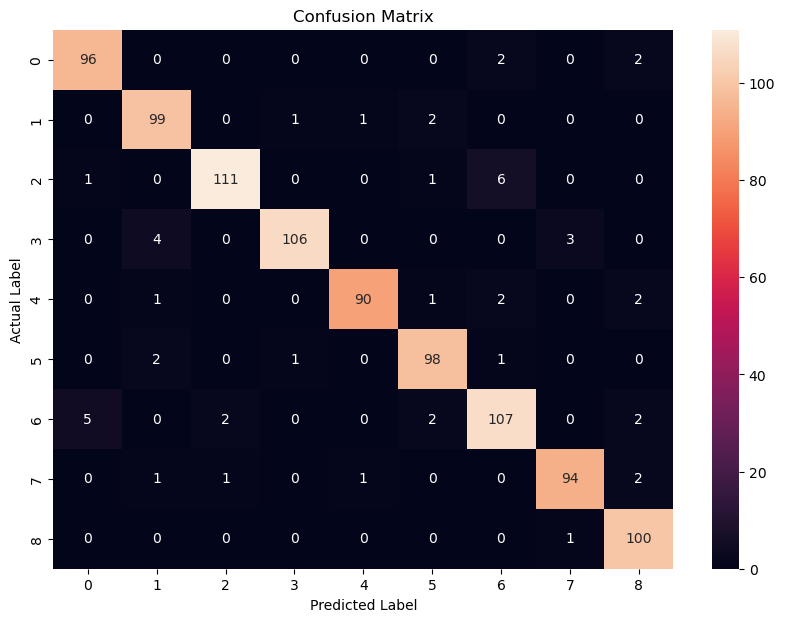

0.9474237644584648

In [32]:
cm = confusion_matrix(y_test, y_pred)


# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [34]:
n_estimators_range = range(1, 101)  # Range of number of estimators
scores = []
rfbegging_time = []
rfbegging_store=[]
ir=range(1,6)

# Run the loop over the range of n_estimators
for i in ir:
    start_time = time.time()
    
    for n_estimators in n_estimators_range:
        model = BaggingClassifier(DecisionTreeClassifier(), 
                                        n_estimators=n_estimators, 
                                        max_samples=0.8, 
                                        random_state=1)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

        rf_begtime = time.time() - start_time
        rfbegging_time.append(rf_begtime)

rfbegging_time

KeyboardInterrupt: 

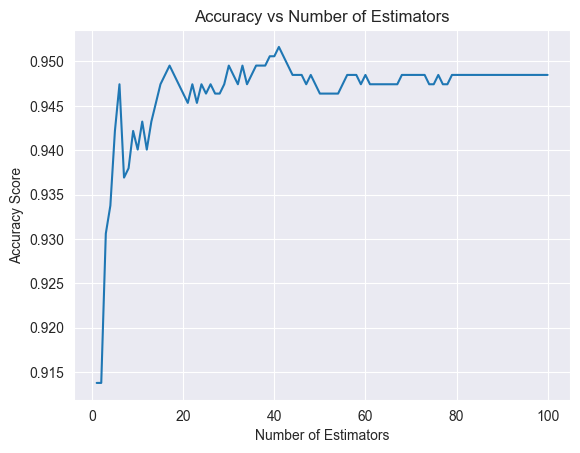

In [52]:
plt.plot(n_estimators_range, scores)
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy Score')
plt.title('Accuracy vs Number of Estimators')
plt.show()

In [18]:
parameter = {'n_estimators': range(1, 201)}
decisiontree = DecisionTreeClassifier()
model = BaggingClassifier(decisiontree, max_samples=0.8, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=parameter, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_n_estimators = grid_search.best_estimator_.get_params()['n_estimators']
print(f"The best number of estimators is: {best_n_estimators}")

KeyboardInterrupt: 

## Kernel SVM (rbf)

In [27]:
model = SVC(kernel = 'rbf', random_state = 1, C=1, gamma = 0.0001)
model.fit(X_train, y_train)

SVC(C=1, gamma=0.0001, random_state=1)

In [28]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[7 7]
 [0 0]
 [7 7]
 ...
 [0 4]
 [1 6]
 [0 0]]


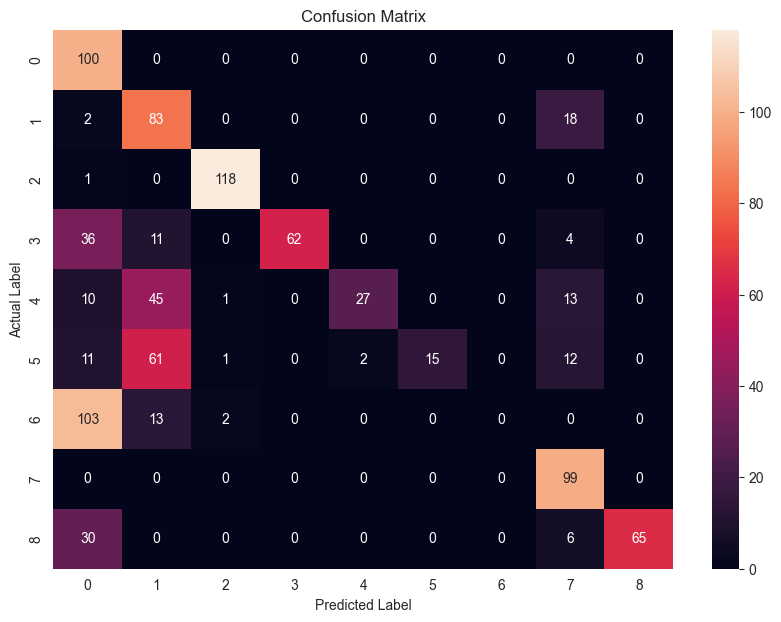

0.5983175604626709

In [29]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [30]:
model = SVC(kernel='rbf',random_state=1)

parameters = {
              'C': [0.1, 1, 100, 1000],
              'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
             }
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

KeyboardInterrupt: 

In [159]:
gridsearch.best_params_

{'C': 1, 'gamma': 0.0001}

## Kernel SVM (Poly)

In [53]:
model = SVC(C=0.1, kernel='poly', random_state = 1)
model.fit(X_train, y_train)

SVC(C=0.1, kernel='poly', random_state=1)

In [32]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


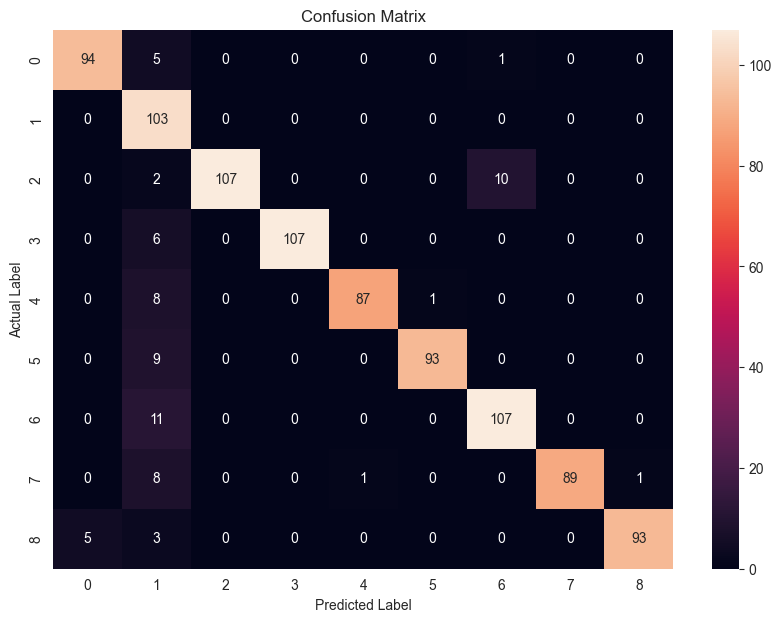

0.92534174553102

In [33]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)


In [142]:
model = SVC(kernel='poly',random_state=1)

parameters = {
              'C': [0.1, 1, 100, 1000],
             }
gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=1),
             param_grid={'C': [0.1, 1, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]})

In [143]:
gridsearch.best_params_

{'C': 0.1, 'gamma': 0.0001}

## Kernel SVM (linear)

In [60]:
linear = []
ir=range(1, 6)
linear_store=[0.03, 0.029, 0.0289, 0.029, 0.0291]

for i in ir:
    start_time = time.time()
    model = SVC(C=1, kernel='linear', random_state = 1)
    model.fit(X_train, y_train)
    linear_time = time.time() - start_time
    linear.append(linear_time)
linear


[0.0299990177154541,
 0.029017210006713867,
 0.028980493545532227,
 0.029001235961914062,
 0.029099464416503906]

In [61]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 7]
 [0 0]
 [7 7]
 ...
 [4 4]
 [6 6]
 [0 0]]


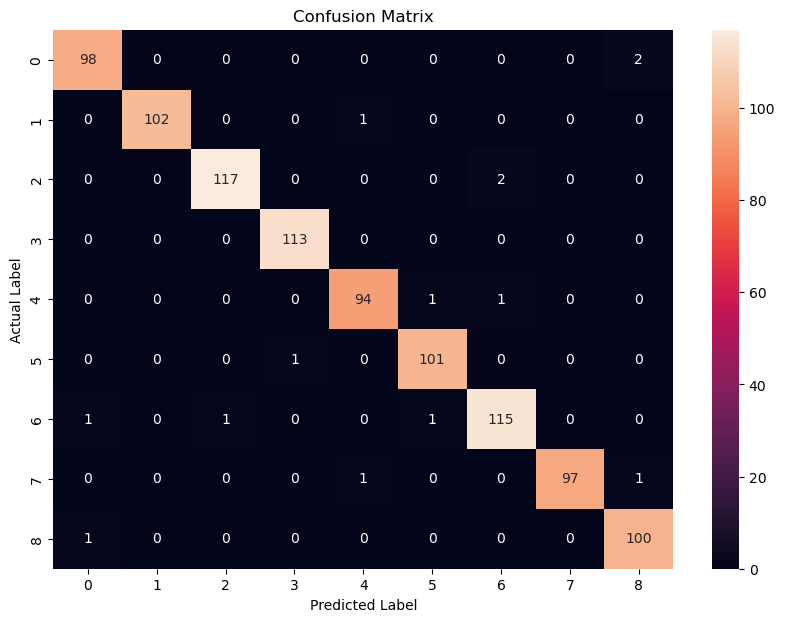

0.9852786540483701

In [62]:
cm = confusion_matrix(y_test, y_pred)
# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

accuracy_score(y_test, y_pred)

In [64]:
linear_grid=[]
ir=range(1, 6)
linear_grid_store=[0.9889, 1.0167, 1.0831, 1.0691, 1.0678]

model = SVC(kernel='linear',random_state=1)

for i in ir:
    start_time = time.time()

    parameters = {
                'C': [0.1, 1, 10, 100, 1000],
                }
    gridsearch = GridSearchCV(estimator=model, param_grid=parameters, cv=5)
    gridsearch.fit(X_train, y_train)
    linear_grid_time = time.time() - start_time
    linear_grid.append(linear_grid_time)

linear_grid
    

[0.9889969825744629,
 1.01674222946167,
 1.0831429958343506,
 1.0691328048706055,
 1.0678441524505615]

In [31]:
gridsearch.best_params_

{'C': 1}